In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score, roc_curve, auc, recall_score

%matplotlib inline

In [2]:
model_2 = pd.read_excel('model2_dataset.xlsx')
model_2.head()

,customer_id,insu_risk_expense,gender,age,bmi,waist,bp_min,bp_max,bt_chol,bt_gluc,bt_rgpt,bt_sgot,bt_sgpt,risk
0,C117780,194376.0,M,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,0
1,C117780,-1869370.0,M,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,1
2,C121178,-913949.0,M,30,24.816327,86.0,80,125,210.0,96.0,134.0,16.0,27.0,1
3,C116605,-1813374.0,M,50,26.259585,88.0,80,130,223.0,114.0,196.0,26.0,23.0,1
4,C129391,-4495124.0,F,35,19.227688,72.0,80,120,157.0,84.0,10.0,11.0,8.0,1


In [3]:
model_2 = pd.get_dummies(model_2.drop('customer_id',axis=1))

In [4]:
model_2 = model_2.dropna()
model_2.head()

,insu_risk_expense,age,bmi,waist,bp_min,bp_max,bt_chol,bt_gluc,bt_rgpt,bt_sgot,bt_sgpt,risk,gender_F,gender_M
0,194376.0,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,0,0,1
1,-1869370.0,50,23.939481,83.0,85,130,252.0,87.0,42.0,18.0,19.0,1,0,1
2,-913949.0,30,24.816327,86.0,80,125,210.0,96.0,134.0,16.0,27.0,1,0,1
3,-1813374.0,50,26.259585,88.0,80,130,223.0,114.0,196.0,26.0,23.0,1,0,1
4,-4495124.0,35,19.227688,72.0,80,120,157.0,84.0,10.0,11.0,8.0,1,1,0


In [5]:
model_2_y = model_2['risk']
model_2_x = model_2.drop(['insu_risk_expense','risk'], axis =1, inplace = False)

In [6]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(model_2_x, model_2_y,\
                                               test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))

train data X size : (1284, 12)
train data Y size : (1284,)
test data X size : (551, 12)
test data X size : (551,)


In [7]:
#분석 모델
model = ["DecisionTree", "RandomForest", "GradientBoosting", "SVC", "NeuralNet"]

#정확도 저장
train_accuracy = []; test_accuracy = []

#f1 score 저장
model_f1_score = []

#auc score 저장
model_auc = []

In [8]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 12, max_depth = 2, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)
dt_model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 30)
dt_model.fit(df_train_x, df_train_y)

#train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
#test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

#예측값
y_pred = dt_model.predict(df_test_x)

#roc_curve(실제값, 예측값), fpr = FP/(FP+TN) : 거짓 양성 비율, tpr = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr,tpr)

#auc 저장
model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y, y_pred))

In [9]:
rf_model = RandomForestClassifier(min_samples_leaf = 20, max_depth = 4,\
                                n_estimators = 40,min_samples_split=20, random_state = 1234)
rf_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

#예측값
y_pred = rf_model.predict(df_test_x)

#roc_curve(실제값, 예측값), fpr = FP/(FP + TN) : 거짓 양성 비율, tpr = TP/(TP/FN) : 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

#auc 저장
model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y, y_pred))

In [10]:
# 모델 생성
gb_final = GradientBoostingClassifier(min_samples_leaf=14, max_depth=3, n_estimators=20,
                                     learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

# 예측값
y_pred = gb_final.predict(df_test_x)

# roc_curve(실제값,예측값), fpr=FP/(FP+TN):거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y, y_pred))

In [11]:
model_f1_score

[0.3758389261744966, 0.44664031620553357, 0.43870967741935485]

In [12]:
v_feature_names = df_train_x.columns

# StandardScaler 적용
scaler = StandardScaler()
df_scaled_x = scaler.fit_transform(model_2_x)
df_scaled_x = pd.DataFrame(df_scaled_x, columns=v_feature_names)

In [13]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scaled_x, model_2_y, test_size=0.3, random_state=1234)

print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(1284, 12)
train data Y size :(1284,)
test data X size :(551, 12)
test data Y size :(551,)


In [14]:
svc_final = SVC(random_state=1234)
svc_final.fit(df_train_x,df_train_y)

# train 정확도
train_accuracy.append(svc_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(svc_final.score(df_test_x, df_test_y))

# 예측값
y_pred = svc_final.predict(df_test_x)

# roc_curve(실제값,예측값), fpr=FP/(FP+TN):거짓 양성 비율, tpr=TP/(TP+FN):진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

# auc 저장
model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y, y_pred))

In [15]:
#모델 생성
nn_model = MLPClassifier(activation="tanh", solver="adam", random_state=1234)
nn_model.fit(df_train_x, df_train_y)

#train 정확도
train_accuracy.append(nn_model.score(df_train_x, df_train_y))
#test 정확도
test_accuracy.append(nn_model.score(df_test_x, df_test_y))

#예측값
y_pred = nn_model.predict(df_test_x)

#roc_curve(실제값, 예측값), fpr = FP/(FP+TN) : 거짓 양성 비율, tpr = TP/(TP+FN): 진짜 양성 비율(재현율)
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr,tpr)

#auc 저장
model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y, y_pred))

C:\Users\PIAI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
#모델별 정확도 표
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval["F1Score"] = model_f1_score
df_eval["AUC"] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.597,0.494,0.376,0.506
RandomForest,0.661,0.492,0.447,0.498
GradientBoosting,0.658,0.526,0.439,0.537
SVC,0.620,0.517,0.401,0.530
NeuralNet,0.637,0.534,0.510,0.538


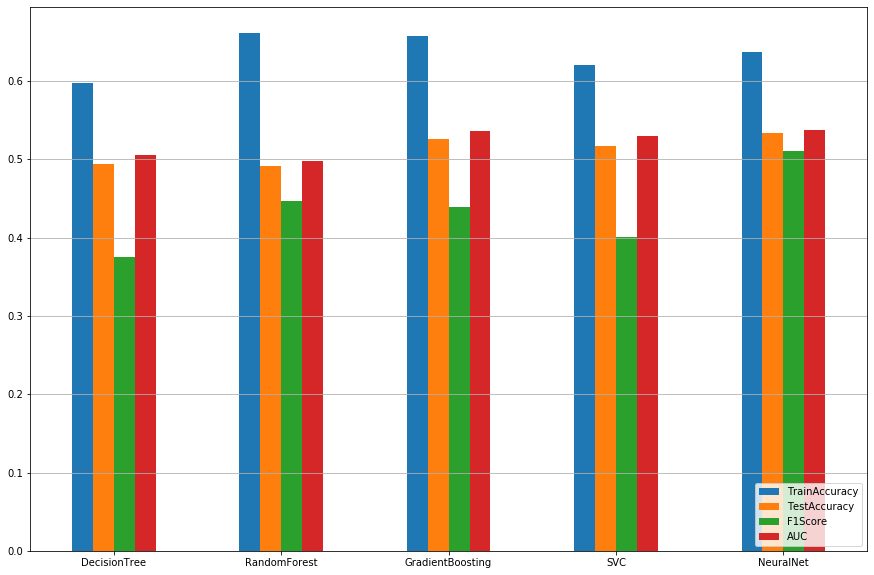

In [18]:
#정확도 bar plot 생성
df_eval.plot.bar(rot=0, figsize=(15, 10))
plt.legend(loc="lower right")
plt.grid(axis="y")